In [4]:
! pip install pyforest

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15927 sha256=7d1633e972e1a12482c2ba597ba8d68b17ad5b5ae9206d30a0313e1e86b2ef45
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\66\4f\3c\cbdf5336b5a84f39cb6e3d76eecb9acf3f99a2c072785afecc
Successfully built pyforest


In [1]:
# import necessary libraries

import pyforest
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data

df_survey = pd.read_csv('2019multiple_choice_responses.csv')
df_survey.head()

<IPython.core.display.Javascript object>

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [3]:
# the first 11 columns of the data

df_survey.columns[:11]

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7', 'Q8'],
      dtype='object')

In [4]:
# subset the data using the first 11 columns

subset_df = df_survey[['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7', 'Q8']]

In [5]:
subset_df

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod..."
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,NaN
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know
...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,-1,Japan,NaN,NaN,-1,NaN,NaN,NaN
19714,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,I do not know
19715,9195,35-39,Male,-1,India,Master’s degree,Student,-1,NaN,NaN,NaN
19716,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,"We recently started using ML methods (i.e., mo..."


In [6]:
# rename columns of the subset data

subset_df = subset_df.rename(columns={
    'Time from Start to Finish (seconds)': 'Duration', 
    'Q1': 'Age', 
    'Q2': 'Gender', 
    'Q2_OTHER_TEXT': 'Gender_Identity',
    'Q3': 'Country',
    'Q4': 'Education_Level',
    'Q5': 'Job_Role',
    'Q5_OTHER_TEXT': 'Recent_Job_Role ', 
    'Q6': 'Company_Size', 
    'Q7': 'DS_Team_Size', 
    'Q8': 'ML_Implementation'
})

In [7]:
subset_df

,Duration,Age,Gender,Gender_Identity,Country,Education_Level,Job_Role,Recent_Job_Role,Company_Size,DS_Team_Size,ML_Implementation
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod..."
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,NaN
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know
...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,-1,Japan,NaN,NaN,-1,NaN,NaN,NaN
19714,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,I do not know
19715,9195,35-39,Male,-1,India,Master’s degree,Student,-1,NaN,NaN,NaN
19716,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,"We recently started using ML methods (i.e., mo..."


In [8]:
subset_df.drop(index=0)

,Duration,Age,Gender,Gender_Identity,Country,Education_Level,Job_Role,Recent_Job_Role,Company_Size,DS_Team_Size,ML_Implementation
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod..."
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,NaN
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods)
...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,-1,Japan,NaN,NaN,-1,NaN,NaN,NaN
19714,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,I do not know
19715,9195,35-39,Male,-1,India,Master’s degree,Student,-1,NaN,NaN,NaN
19716,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,"We recently started using ML methods (i.e., mo..."


### Reasons for renaming the columns

To help read, interpret and understand the code and what we are dealing with in our data.To also facilitate downstream analysis, I renamed the first 11 columns of the dataset using meaningful, concise labels. The original column names included ambiguous codes/names (e.g., "Q1", "Q2"). The new names reflect the actual content or question intent in a compact and more understandable format:

- `Duration`: Time taken to complete the survey.
- `Age`: Respondent's age.
- `Gender`: Respondent's selected gender identity.
- `Gender_Self_Described`: Custom gender text for those who selected "prefer to self-describe".
- `Country`: Respondent's country of residence.
- `Education_Level`: Highest level of formal education.
- `Job_Role`: Closest job title selected.
- `Recent_Job_Role`: Custom job title if "Other" was selected.
- `Company_Size`: Number of employees at respondent's workplace.
- `DS_Team_Size`: Number of individuals handling data science workloads.
- `ML_Usage`: Whether machine learning is used at the respondent's organization by the employer.

This renaming helps ensure the dataset is cleaner, easier to explore, and ready for analysis or visualization.


In [17]:
subset_df['Country'].unique()

array(['In which country do you currently reside?', 'France', 'India',
       'Germany', 'Australia', 'United States of America', 'Netherlands',
       'Ireland', 'Russia', 'Greece', 'Ukraine', 'Pakistan', 'Japan',
       'Other', 'Brazil', 'South Korea', 'Belarus', 'Nigeria',
       'United Kingdom of Great Britain and Northern Ireland', 'Sweden',
       'Mexico', 'Canada', 'Portugal', 'Poland', 'Indonesia', 'Italy',
       'Czech Republic', 'Spain', 'Morocco', 'Chile',
       'Hong Kong (S.A.R.)', 'South Africa', 'Hungary', 'Argentina',
       'Turkey', 'Singapore', 'Israel', 'Taiwan', 'Egypt', 'Bangladesh',
       'Colombia', 'Norway', 'Thailand', 'China', 'Switzerland',
       'Viet Nam', 'Denmark', 'Tunisia', 'Republic of Korea',
       'New Zealand', 'Iran, Islamic Republic of...', 'Peru', 'Kenya',
       'Romania', 'Malaysia', 'Belgium', 'Algeria', 'Austria',
       'Philippines', 'Saudi Arabia'], dtype=object)

In [10]:
# Identify the correct columns for country and education
country_col = [col for col in subset_df.columns if 'country' in col.lower()][0]
education_col = [col for col in subset_df.columns if 'education' in col.lower()][0]

country_col, education_col

('Country', 'Education_Level')

In [11]:
# Rename for convenience
subset_df = subset_df.rename(columns={
    'In which country do you currently reside?': 'Country',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education Level'
})

In [12]:
# Choose one representative country per continent (excluding Antarctica)
selected_countries = {
    'Asia': 'India',
    'Africa': 'Nigeria',
    'North America': 'United States of America',
    'South America': 'Brazil',
    'Europe': 'Germany',
    'Oceania': 'Australia'
}

# Subset the data
subset_df1 = subset_df[subset_df['Country'].isin(selected_countries.values())]

# Check the number of responses per country
subset_df1['Country'].value_counts()

Country
India                       4786
United States of America    3085
Brazil                       728
Germany                      531
Nigeria                      395
Australia                    269
Name: count, dtype: int64

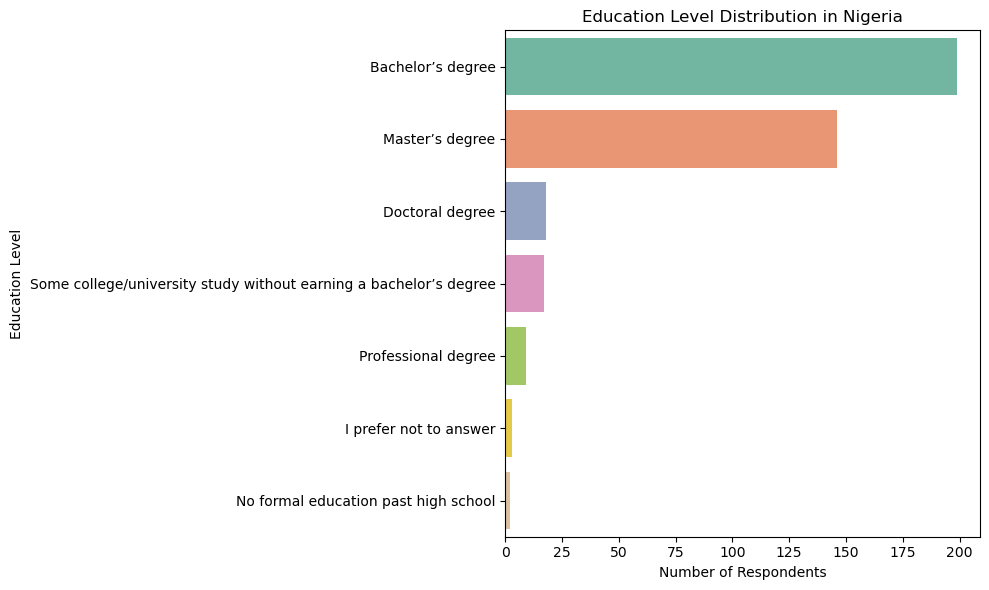

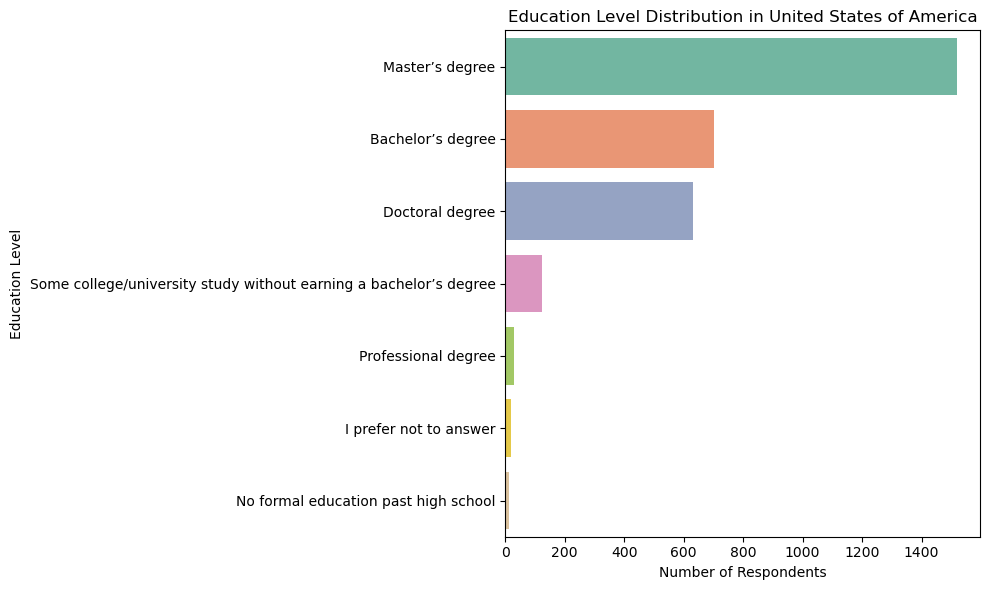

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot education distribution for a given country
def plot_education_distribution(country):
    country_df = subset_df[subset_df['Country'] == country]
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Education_Level', data=country_df, 
                  order=country_df['Education_Level'].value_counts().index,
                  palette='Set2')
    plt.title(f'Education Level Distribution in {country}')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Education Level')
    plt.tight_layout()
    plt.show()

# Run this for two countries from different continents:
plot_education_distribution('Nigeria')  # Asia
plot_education_distribution('United States of America')  # North America

Insight for United States:

    In the United States, people working in data science have different levels of education. Many have a Bachelor’s, Master’s, or even a PhD. This shows that there are many different ways to enter the field of data science—some start after their first degree, while others continue with more studies before joining.



Insight for Nigeria:

       In Nigeria, most people working in data science have a Bachelor’s degree, and fewer have a Master’s degree. This means that many Nigerians are starting their careers in data science right after finishing their first degree at the university. Compared to India, fewer people in Nigeria go on to get higher degrees like a Master’s or PhD before working in this field.